# Import libraries 

As a data scientist, you would typically use libraries such as: 
- `pandas` : used to read data into a structured tabular format known as a `DataFrame`. It supports reading data from files, databases and APIs. It allows for operations to be performed on the `DataFrame` before then being written out to another file or database. 
- `statsmodels` : used to train a model and perform forecasting. 
- `scikit-learn` : used to train a model and perform forecasting.  
- And much more..! Depending on what you need to do. 

Go ahead an import these popular libraries into your notebook by running

```python
import pandas as pd  
import statsmodels.api as sm
import matplotlib.pyplot as plt
```

If these libraries do not exist on your computer, you would see a `Module Not Found` error. In that case, go ahead and install these libraries by running: 

```
pip install pandas 
pip install statsmodels
pip install matplotlib
```


In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Reading in data

As a Data Scientist, you would work closely with the Data Engineer to have the data pulled in from various sources to speed up your ability to create machine learning models. 

For this instructor demo, let's assume that a Data Engineer has prepared a dataset for you (as per the previous exercises we did), and the dataset is stored in `../resources/final_superstore.csv`. 

We can read in the data using: 
```python
pd.read_csv("file_path_here")
```

In [3]:
df = pd.read_csv("../resources/final_superstore.csv")
df.head()

,customer_id,customer_city,customer_state,order_purchase_timestamp,price,freight_value,product_category_name_english,total_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,2017-05-16 15:05:35,124.99,21.88,office_furniture,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,santarem,PA,2017-11-09 00:50:13,112.99,24.90,office_furniture,137.89
2,8912fc0c3bbf1e2fbf35819e21706718,santarem,PA,2017-11-09 00:50:13,112.99,24.90,office_furniture,137.89
3,f0ac8e5a239118859b1734e1087cbb1f,nova santa rita,RS,2017-05-07 20:11:26,124.99,15.62,office_furniture,140.61
4,6bc8d08963a135220ed6c6d098831f84,mage,RJ,2018-02-03 19:45:40,106.99,30.59,office_furniture,137.58


# Feature engineering

As a Data Scientist, you would often have to generate new features (columns) from existing data. 

These new features are used in the building of a machine learning model. 

Create a new date column (feature) so that it can be used in a time series forecasting model. 

In [50]:
df["order_date"] = pd.to_datetime(df["order_purchase_timestamp"]).dt.date.astype(str)
df.head()

,customer_id,customer_city,customer_state,order_purchase_timestamp,price,freight_value,product_category_name_english,total_value,order_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,2017-05-16 15:05:35,124.99,21.88,office_furniture,146.87,2017-05-16
1,8912fc0c3bbf1e2fbf35819e21706718,santarem,PA,2017-11-09 00:50:13,112.99,24.90,office_furniture,137.89,2017-11-09
2,8912fc0c3bbf1e2fbf35819e21706718,santarem,PA,2017-11-09 00:50:13,112.99,24.90,office_furniture,137.89,2017-11-09
3,f0ac8e5a239118859b1734e1087cbb1f,nova santa rita,RS,2017-05-07 20:11:26,124.99,15.62,office_furniture,140.61,2017-05-07
4,6bc8d08963a135220ed6c6d098831f84,mage,RJ,2018-02-03 19:45:40,106.99,30.59,office_furniture,137.58,2018-02-03


Prepare your dataset to be used in a time series forecasting model by grouping your data by `order_date` and summing up `total_value`.  

In [59]:
sales_df = pd.DataFrame(df.groupby(by=['order_date']).sum()['total_value'])
sales_df.head()

,total_value
order_date,
2016-09-04,136.23
2016-09-05,75.06
2016-09-15,143.46
2016-10-02,109.34
2016-10-03,595.14


# Train model 

As a Data Scientist, your role is to build a model that would answer a forwards-looking business question. 

For example: "How much revenue can I expect to generate in the next 3 months?" 

Depending on the question you are trying to answer, you will select different types of models. 

In this example, you will use SARIMAX, a time series forecasting method. 

```python
model = sm.tsa.statespace.SARIMAX(df,order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
```

Where: 
- `df`: your DataFrame with the date set as the index and a column for the values 
- `order`: the (p,d,q) order of the model. 
- `seasonal_order`: the (P,D,Q,s) order of the seasonal component of the model 

In [60]:
# fit a time series model 
import warnings
warnings.filterwarnings('ignore')

model = sm.tsa.statespace.SARIMAX(sales_df,order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
result = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04701D+01    |proj g|=  9.15826D-02

At iterate    5    f=  1.04352D+01    |proj g|=  1.11593D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     10      1     0     0   3.479D-05   1.044D+01
  F =   10.435151415730264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


# Perform prediction

Taking the trained model, you can now perform predictions against data it has seen before to see what the model would've predicted. 

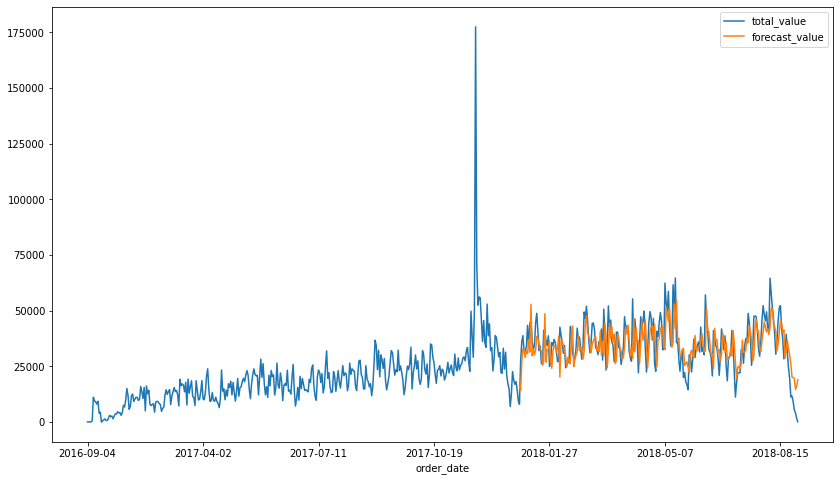

In [63]:
sales_df['forecast_value']= result.predict(start='2018-01-01', end='2018-09-03', dynamic=False)

# visualization for the same
sales_df.plot(figsize=(14, 8))
plt.show()

# Perform forecast 

Taking the trained model, you can now perform forecasts for data the model has not seen before (also known as an out-of-sample forecast). 

In [65]:
sales_df.index.get_loc("2018-09-03")

615

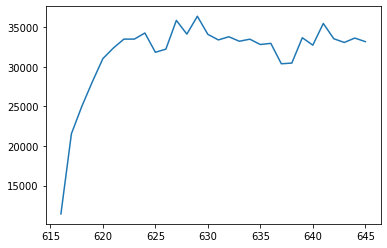

In [66]:
# forecast 30 days from the last recorded date in the dataset 
plt.plot(result.forecast(steps=30))
plt.show()